In [36]:
# Import the libraries required
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [37]:
News_DIJA_data = pd.read_csv("~/workspace/dat11syd/students/surenchand/data/Combined_News_DJIA.csv")

In [38]:
#drop any nan value
News_DIJA_data.dropna(how='any', inplace=True)

In [39]:
#change object to date time stamp
News_DIJA_data['Date'] = pd.to_datetime(News_DIJA_data['Date'])

In [40]:
News_DIJA_data.select_dtypes(['object']).columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [41]:
#remove unneccesary characters from all columns
News_Columns = News_DIJA_data.select_dtypes(['object']).columns
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace('b"',"",regex=True)
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace("b'","", regex=True)
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace("-"," ", regex=True)
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace("'","", regex=True)
News_DIJA_data[News_Columns] = News_DIJA_data[News_Columns].replace("&amp;","",regex=True)

In [42]:
News_DIJA_data.head(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,Georgia downs two Russian warplanes as countri...,BREAKING: Musharraf to be impeached.,Russia Today: Columns of troops roll into Sout...,Russian tanks are moving towards the capital o...,"Afghan children raped with impunity, U.N. offi...",150 Russian tanks have entered South Ossetia w...,"Breaking: Georgia invades South Ossetia, Russi...",The enemy combatent trials are nothing but a s...,...,Georgia Invades South Ossetia if Russia gets...,Al Qaeda Faces Islamist Backlash,"Condoleezza Rice: ""The US would not act to pre...",This is a busy day: The European Union has ap...,"Georgia will withdraw 1,000 soldiers from Iraq...",Why the Pentagon Thinks Attacking Iran is a Ba...,Caucasus in crisis: Georgia invades South Ossetia,Indian shoe manufactory And again in a seri...,Visitors Suffering from Mental Illnesses Banne...,"No Help for Mexicos Kidnapping Surge"""
1,2008-08-11,1,Why wont America and Nato help us? If they won...,Bush puts foot down on Georgian conflict,Jewish Georgian minister: Thanks to Israeli tr...,Georgian army flees in disarray as Russians ad...,"Olympic opening ceremony fireworks faked""",What were the Mossad with fraudulent New Zeala...,Russia angered by Israeli military sale to Geo...,An American citizen living in S.Ossetia blames...,...,Israel and the US behind the Georgian aggression?,"""Do not believe TV, neither Russian nor Georgi...",Riots are still going on in Montreal (Canada) ...,China to overtake US as largest manufacturer,War in South Ossetia [PICS],Israeli Physicians Group Condemns State Torture,Russia has just beaten the United States over...,Perhaps *the* question about the Georgia Rus...,Russia is so much better at war,So this is what its come to: trading sex for f...
2,2008-08-12,0,Remember that adorable 9 year old who sang at ...,"Russia ends Georgia operation""","""If we had no sexual harassment we would have ...",Al Qaeda is losing support in Iraq because of ...,Ceasefire in Georgia: Putin Outmaneuvers the West,Why Microsoft and Intel tried to kill the XO $...,Stratfor: The Russo Georgian War and the Balan...,Im Trying to Get a Sense of This Whole Georgia...,...,U.S. troops still in Georgia (did you know the...,Why Russias response to Georgia was right,"Gorbachev accuses U.S. of making a ""serious bl...","Russia, Georgia, and NATO: Cold War Two",Remember that adorable 62 year old who led you...,War in Georgia: The Israeli connection,All signs point to the US encouraging Georgia ...,Christopher King argues that the US and NATO a...,America: The New Mexico?,BBC NEWS | Asia Pacific | Extinction by man no...
3,2008-08-13,0,U.S. refuses Israel weapons to attack Iran: r...,When the president ordered to attack Tskhinval...,Israel clears troops who killed Reuters camer...,"Britain\s policy of being tough on drugs is ""p...",Body of 14 year old found in trunk; Latest (ra...,China has moved 10 *million* quake survivors i...,Bush announces Operation Get All Up In Russias...,Russian forces sink Georgian ships,...,Elephants extinct by 2020?,US humanitarian missions soon in Georgia if ...,"Georgias DDOS came from US sources""","Russian convoy heads into Georgia, violating t...",Israeli defence minister: US against strike on...,Gorbachev: We Had No Choice,Witness: Russian forces head towards Tbilisi i...,Quarter of Russians blame U.S. for conflict: ...,Georgian president says US military will take...,2006: Nobel laureate Aleksander Solzhenitsyn a...
4,2008-08-14,1,All the experts admit that we should legalise ...,War in South Osetia 89 pictures made by a Ru...,Swedish wrestler Ara Abrahamian throws away me...,Russia exaggerated the death toll in South Oss...,Missile That Killed 9 Inside Pakistan May Have...,Rushdie Condemns Random Houses Refusal to Publ...,Poland and US agree to missle defense deal. In...,"Will the Russians conquer Tblisi? Bet on it, n...",...,Bank analyst forecas

In [43]:
Label_Mean = News_DIJA_data.mean()
print(Label_Mean)

Label    0.534743
dtype: float64


In [44]:
DIJA_data = pd.read_csv("~/workspace/dat11syd/students/surenchand/data/DJIA_table.csv")

In [45]:
DIJA_data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


Text(0.5,1,'Daily Stock Market Variation')

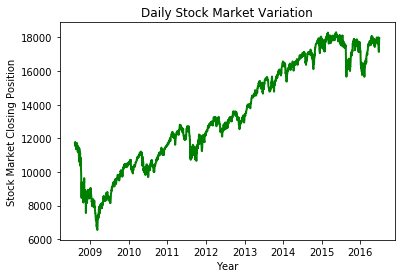

In [76]:
import matplotlib.pyplot as plt
DIJA_data['Date'] = pd.to_datetime(DIJA_data['Date'])
x = DIJA_data['Date']
y = DIJA_data['Close']
plt.plot(x,y, color='green', linestyle='-', linewidth=2 )
plt.xlabel("Year")
plt.ylabel("Stock Market Closing Position")
plt.title("Daily Stock Market Variation")

In [47]:
import pandas as pd
News_DIJA_data['Combined'] = ""
for x in News_Columns:
    #print (x)
    News_DIJA_data['Combined'] = News_DIJA_data['Combined'].map(str) + News_DIJA_data[x].map(str)

#pd.concat(News_DIJA_data['Combined'] , News_DIJA_data['Top1'])

In [48]:
News_DIJA_data['Combined'].head(10)

0    Georgia downs two Russian warplanes as countri...
1    Why wont America and Nato help us? If they won...
2    Remember that adorable 9 year old who sang at ...
3     U.S. refuses Israel weapons to attack Iran: r...
4    All the experts admit that we should legalise ...
5    Mom of missing gay man: Too bad hes not a 21 y...
6    In an Afghan prison, the majority of female pr...
7    Man arrested and locked up for five hours afte...
8    Two elderly Chinese women have been sentenced ...
9    British resident held in Guantanamo Bay wins l...
Name: Combined, dtype: object

In [49]:
News_DIJA_data['Combined'].to_csv('myfile.csv')

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
Text = News_DIJA_data['Combined'].str.lower()

In [13]:
tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3))
sent_vectors=tfdif.fit_transform(Text)
Words = tfdif.get_feature_names()
print (len(Words))

956124


In [14]:
tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), min_df=10)
sent_vectors=tfdif.fit_transform(Text)
Words = tfdif.get_feature_names()
print (len(Words))

1678


In [15]:
tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), min_df=20)
sent_vectors=tfdif.fit_transform(Text)
Words = tfdif.get_feature_names()
print (len(Words))

538


In [16]:
tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), min_df=30)
sent_vectors=tfdif.fit_transform(Text)
Words = tfdif.get_feature_names()
print (len(Words))

262


In [78]:
MSE = []
Accuracy = []
MaxFeatures = []

for x in range(10,260,5):
    tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), min_df=30,  max_features=x)
    sent_vectors=tfdif.fit_transform(Text)
    #Words = tfdif.get_feature_names()
    df1 = pd.DataFrame(sent_vectors.toarray(), columns=tfdif.get_feature_names())
    res1 = pd.concat([News_DIJA_data, df1], axis=1)
    res1.drop(res1.iloc[:,2:27],axis=1, inplace=True)
    res1.dropna(how='any', inplace=True)
    feature_cols = tfdif.get_feature_names()

    X = res1[feature_cols]
    y = res1.Label
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    logreg = LogisticRegression(C=1e9)
    logreg.fit(X_train, y_train)
    label_pred = logreg.predict(X_test)
    
    AccuracyScore = metrics.accuracy_score(y_test, label_pred)
    MeanSquaredError = mean_squared_error(y_test, label_pred)
    
    MaxFeatures.append(x)
    Accuracy.append(AccuracyScore)
    MSE.append(MeanSquaredError)
    
    print("The Accuracy sore and MSE for Features: ", x)
    print("Accuracy is: ", AccuracyScore )
    print("MSE is: ", MeanSquaredError )


The Accuracy sore and MSE for Features:  10
Accuracy is:  0.5120967741935484
MSE is:  0.4879032258064516
The Accuracy sore and MSE for Features:  15
Accuracy is:  0.5141129032258065
MSE is:  0.48588709677419356
The Accuracy sore and MSE for Features:  20
Accuracy is:  0.530241935483871
MSE is:  0.46975806451612906
The Accuracy sore and MSE for Features:  25
Accuracy is:  0.5161290322580645
MSE is:  0.4838709677419355
The Accuracy sore and MSE for Features:  30
Accuracy is:  0.5221774193548387
MSE is:  0.4778225806451613
The Accuracy sore and MSE for Features:  35
Accuracy is:  0.5181451612903226
MSE is:  0.48185483870967744
The Accuracy sore and MSE for Features:  40
Accuracy is:  0.5141129032258065
MSE is:  0.48588709677419356
The Accuracy sore and MSE for Features:  45
Accuracy is:  0.5040322580645161
MSE is:  0.4959677419354839
The Accuracy sore and MSE for Features:  50
Accuracy is:  0.530241935483871
MSE is:  0.46975806451612906
The Accuracy sore and MSE for Features:  55
Accuracy

In [18]:
print(Accuracy)

[0.5120967741935484, 0.5141129032258065, 0.530241935483871, 0.5161290322580645, 0.5221774193548387, 0.5181451612903226, 0.5141129032258065, 0.5040322580645161, 0.530241935483871, 0.530241935483871, 0.5282258064516129, 0.5342741935483871, 0.5262096774193549, 0.5241935483870968, 0.5262096774193549, 0.530241935483871, 0.5181451612903226, 0.5241935483870968, 0.5221774193548387, 0.5383064516129032, 0.5443548387096774, 0.5262096774193549, 0.5221774193548387, 0.5181451612903226, 0.5201612903225806, 0.5221774193548387, 0.5120967741935484, 0.5120967741935484, 0.5, 0.5080645161290323, 0.49798387096774194, 0.47580645161290325, 0.4737903225806452, 0.4879032258064516, 0.4899193548387097, 0.4778225806451613, 0.4838709677419355, 0.4778225806451613, 0.48185483870967744, 0.4717741935483871, 0.4838709677419355, 0.4717741935483871, 0.4798387096774194, 0.4899193548387097, 0.47580645161290325, 0.46975806451612906, 0.4717741935483871, 0.47580645161290325, 0.46975806451612906, 0.48185483870967744]


In [19]:
print(MSE)

[0.4879032258064516, 0.48588709677419356, 0.46975806451612906, 0.4838709677419355, 0.4778225806451613, 0.48185483870967744, 0.48588709677419356, 0.4959677419354839, 0.46975806451612906, 0.46975806451612906, 0.4717741935483871, 0.4657258064516129, 0.4737903225806452, 0.47580645161290325, 0.4737903225806452, 0.46975806451612906, 0.48185483870967744, 0.47580645161290325, 0.4778225806451613, 0.46169354838709675, 0.45564516129032256, 0.4737903225806452, 0.4778225806451613, 0.48185483870967744, 0.4798387096774194, 0.4778225806451613, 0.4879032258064516, 0.4879032258064516, 0.5, 0.49193548387096775, 0.5020161290322581, 0.5241935483870968, 0.5262096774193549, 0.5120967741935484, 0.5100806451612904, 0.5221774193548387, 0.5161290322580645, 0.5221774193548387, 0.5181451612903226, 0.5282258064516129, 0.5161290322580645, 0.5282258064516129, 0.5201612903225806, 0.5100806451612904, 0.5241935483870968, 0.530241935483871, 0.5282258064516129, 0.5241935483870968, 0.530241935483871, 0.5181451612903226]


Text(120,0.54,'Max Features above mean')

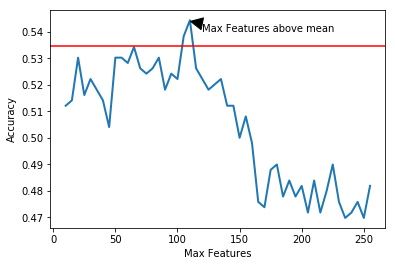

In [82]:
plt.plot(MaxFeatures, Accuracy, linewidth=2.0)
#hlines(Label_Mean, 5, 150)
#plt.plot([Label_Mean, Label_Mean], [5, 150], color='k', linestyle='-', linewidth=2)
plt.axhline(y=.534743, color = 'r')
plt.xlabel("Max Features")
plt.ylabel("Accuracy")
plt.annotate('Max Features above mean', xy=(110, 0.544), xytext=(120, 0.54),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

Text(0,0.5,'MSE')

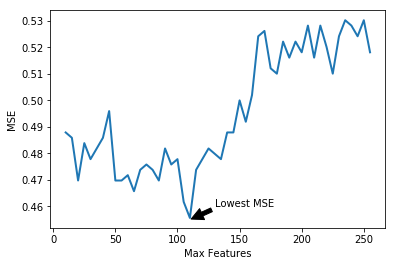

In [84]:
plt.plot(MaxFeatures, MSE, linewidth=2.0)
#hlines(Label_Mean, 5, 150)
#plt.plot([Label_Mean, Label_Mean], [5, 150], color='k', linestyle='-', linewidth=2)
plt.annotate('Lowest MSE', xy=(110, 0.455), xytext=(130, 0.46),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlabel("Max Features")
plt.ylabel("MSE")

In [86]:
import numpy as np
C_Values = list(np.power(10.0, np.arange(-10, 10)))
#print (C_Values)
MSE = []
Accuracy = []

for z in C_Values:
    tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), min_df=30, max_features=110)
    sent_vectors=tfdif.fit_transform(Text)
    #Words = tfdif.get_feature_names()
    df2 = pd.DataFrame(sent_vectors.toarray(), columns=tfdif.get_feature_names())
    res2 = pd.concat([News_DIJA_data, df2], axis=1)
    res2.drop(res2.iloc[:,2:27],axis=1, inplace=True)
    res2.dropna(how='any', inplace=True)
    feature_cols = tfdif.get_feature_names()

    X = res2[feature_cols]
    y = res2.Label
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    logreg = LogisticRegression(C=z)
    logreg.fit(X_train, y_train)
    label_pred = logreg.predict(X_test)
    
    AccuracyScore = metrics.accuracy_score(y_test, label_pred)
    MeanSquaredError = mean_squared_error(y_test, label_pred)
    
    Accuracy.append(AccuracyScore)
    MSE.append(MeanSquaredError)
    
    print("The Accuracy sore and MSE for C Values: ", z)
    print("Accuracy is: ", AccuracyScore )
    print("MSE is: ", MeanSquaredError )

The Accuracy sore and MSE for C Values:  1e-10
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore and MSE for C Values:  1e-09
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore and MSE for C Values:  1e-08
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore and MSE for C Values:  1e-07
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore and MSE for C Values:  1e-06
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore and MSE for C Values:  1e-05
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore and MSE for C Values:  0.0001
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore and MSE for C Values:  0.001
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore and MSE for C Values:  0.01
Accuracy is:  0.5080645161290323
MSE is:  0.49193548387096775
The Accuracy sore a

In [24]:
max(Accuracy)
print (max(Accuracy))
[i for i,x in enumerate(Accuracy) if x == max(Accuracy)]

0.5443548387096774


[11, 12, 13, 14, 15, 16, 17, 18, 19]

Text(0,0.5,'Accuracy')

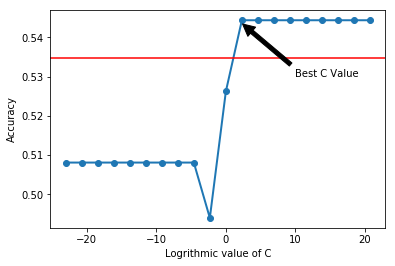

In [87]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.log(C_Values), Accuracy, marker='o',linewidth=2.0)
plt.axhline(y=.534743, color = 'r')
plt.annotate('Best C Value ', xy=(2, 0.544), xytext=(10, 0.53),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlabel("Logrithmic value of C")
plt.ylabel("Accuracy")

In [26]:
MSE = []
Accuracy = []
MaxFeatures = []

for x in range(10,260,5):
    tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), min_df=30,  max_features=x)
    sent_vectors=tfdif.fit_transform(Text)
    #Words = tfdif.get_feature_names()
    df3 = pd.DataFrame(sent_vectors.toarray(), columns=tfdif.get_feature_names())
    res3 = pd.concat([News_DIJA_data, df3], axis=1)
    res3.drop(res3.iloc[:,2:27],axis=1, inplace=True)
    res3.dropna(how='any', inplace=True)
    feature_cols = tfdif.get_feature_names()

    X = res3[feature_cols]
    y = res3.Label
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    logreg = LogisticRegression(C=100)
    logreg.fit(X_train, y_train)
    label_pred = logreg.predict(X_test)
    
    AccuracyScore = metrics.accuracy_score(y_test, label_pred)
    MeanSquaredError = mean_squared_error(y_test, label_pred)
    
    MaxFeatures.append(x)
    Accuracy.append(AccuracyScore)
    MSE.append(MeanSquaredError)
    
    print("The Accuracy sore and MSE for Features: ", x)
    print("Accuracy is: ", AccuracyScore )
    print("MSE is: ", MeanSquaredError )


The Accuracy sore and MSE for Features:  10
Accuracy is:  0.5120967741935484
MSE is:  0.4879032258064516
The Accuracy sore and MSE for Features:  15
Accuracy is:  0.5141129032258065
MSE is:  0.48588709677419356
The Accuracy sore and MSE for Features:  20
Accuracy is:  0.530241935483871
MSE is:  0.46975806451612906
The Accuracy sore and MSE for Features:  25
Accuracy is:  0.5161290322580645
MSE is:  0.4838709677419355
The Accuracy sore and MSE for Features:  30
Accuracy is:  0.5221774193548387
MSE is:  0.4778225806451613
The Accuracy sore and MSE for Features:  35
Accuracy is:  0.5181451612903226
MSE is:  0.48185483870967744
The Accuracy sore and MSE for Features:  40
Accuracy is:  0.5141129032258065
MSE is:  0.48588709677419356
The Accuracy sore and MSE for Features:  45
Accuracy is:  0.5040322580645161
MSE is:  0.4959677419354839
The Accuracy sore and MSE for Features:  50
Accuracy is:  0.530241935483871
MSE is:  0.46975806451612906
The Accuracy sore and MSE for Features:  55
Accuracy

Text(0,0.5,'Accuracy')

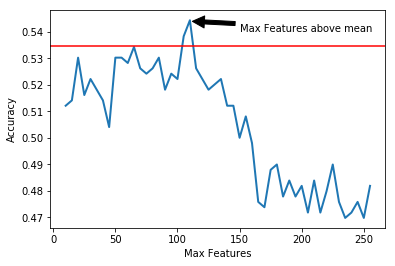

In [81]:
plt.plot(MaxFeatures, Accuracy, linewidth=2.0)
#hlines(Label_Mean, 5, 150)
#plt.plot([Label_Mean, Label_Mean], [5, 150], color='k', linestyle='-', linewidth=2)
plt.axhline(y=.534743, color = 'r')
plt.annotate('Max Features above mean', xy=(110, 0.544), xytext=(150, 0.54),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlabel("Max Features")
plt.ylabel("Accuracy")

In [63]:
tfdif = TfidfVectorizer(stop_words='english', ngram_range=(2, 3), min_df=30,  max_features=110)
sent_vectors=tfdif.fit_transform(Text)
Words = tfdif.get_feature_names()
print(Words)


['000 people', '000 year', '10 000', '10 years', '100 000', '20 years', '30 000', '30 years', 'air force', 'al jazeera', 'al qaeda', 'al qaida', 'barack obama', 'barrier reef', 'bbc news', 'bin laden', 'boko haram', 'catholic church', 'chemical weapons', 'child abuse', 'civil war', 'climate change', 'court rules', 'david cameron', 'death penalty', 'death toll', 'drug war', 'east jerusalem', 'edward snowden', 'european union', 'far right', 'foreign minister', 'fukushima nuclear', 'gay marriage', 'gaza strip', 'global warming', 'high court', 'hong kong', 'human rights', 'iraq war', 'islamic state', 'julian assange', 'kim jong', 'middle east', 'million people', 'minister says', 'new law', 'new york', 'new zealand', 'nobel peace', 'north korea', 'north korean', 'north koreas', 'nuclear plant', 'nuclear power', 'nuclear weapons', 'officials say', 'oil spill', 'old girl', 'osama bin', 'peace prize', 'people killed', 'phone hacking', 'pirate bay', 'pirate party', 'police officer', 'police off

In [79]:
df4 = pd.DataFrame(sent_vectors.toarray(), columns=tfdif.get_feature_names())
print(df4.iloc[:,10:20])

      14 year old  15 year  15 years  16 year  16 year old  20 000  20 years  \
0        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
1        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
2        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
3        0.584294  0.00000  0.000000      0.0          0.0     0.0       0.0   
4        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
5        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
6        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
7        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
8        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
9        0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
10       0.000000  0.00000  0.000000      0.0          0.0     0.0       0.0   
11       0.000000  0.00000  0.000000    

In [80]:
res4 = pd.concat([News_DIJA_data, df4], axis=1)
res4.drop(res4.iloc[:,2:27],axis=1, inplace=True)
res4.dropna(how='any', inplace=True)
res4.head()

,Date,Label,Combined,000 people,000 year,000 year old,000 years,10 000,10 years,100 000,...,year old,year old boy,year old girl,years ago,years jail,years old,years prison,york times,young people,yr old
0,2008-08-08,0.0,Georgia downs two Russian warplanes as countri...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.194431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2008-08-11,1.0,Why wont America and Nato help us? If they won...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2008-08-12,0.0,Remember that adorable 9 year old who sang at ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.423161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2008-08-13,0.0,U.S. refuses Israel weapons to attack Iran: r...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.273146,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2008-08-14,1.0,All the experts admit that we should legalise ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
res4.mean().sort_values(ascending=False)

Label                0.534039
year old             0.081339
prime minister       0.063918
north korea          0.062431
human rights         0.062119
united states        0.046620
saudi arabia         0.040936
islamic state        0.037098
climate change       0.035016
west bank            0.033817
north korean         0.028529
war crimes           0.028489
middle east          0.027714
new zealand          0.026620
al qaeda             0.025541
south korea          0.025234
bbc news             0.024772
kim jong             0.024506
united nations       0.024299
shot dead            0.023071
vladimir putin       0.023038
000 people           0.022825
years ago            0.022541
european union       0.022409
security forces      0.022234
world war            0.021681
south africa         0.021045
world cup            0.020886
hong kong            0.020854
al jazeera           0.020825
                       ...   
gaza strip           0.012250
pirate party         0.012217
global war

In [32]:
import spacy
import textacy
from textacy import text_utils
#text_utils.keyword_in_context(str(Text),'year old', window_width = 30)

In [33]:
text_utils.keyword_in_context(str(Text),'prime minister', window_width = 50)

r georgia is a declaration of ...
15      russian  prime minister  vladimir putin has accu...
16      a girl filmed 
branches of sci...
21      i love the world: thai  prime minister  samak su...
22      dutch to ban burkas when pick


In [67]:
feature_cols = tfdif.get_feature_names()

X = res4[feature_cols]
y = res4.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg = LogisticRegression(C=100)
logreg.fit(X_train, y_train)
label_pred = logreg.predict(X_test)

In [68]:
coeffs1 = zip(feature_cols, logreg.coef_[0])
list(coeffs1)

[('000 people', 0.2756397686495033),
 ('000 year', 0.7666866333603849),
 ('10 000', 1.003951201731008),
 ('10 years', -0.39800323650494046),
 ('100 000', -1.1417782049913574),
 ('20 years', 1.1812140384832759),
 ('30 000', -0.4565640132762335),
 ('30 years', -0.06979983262720406),
 ('air force', 0.1617941476325791),
 ('al jazeera', 1.6430643562077623),
 ('al qaeda', 0.002071464641963699),
 ('al qaida', -0.054482510725596275),
 ('barack obama', -0.21223752455888842),
 ('barrier reef', 0.972344352329728),
 ('bbc news', 0.7930875032059642),
 ('bin laden', -0.49396694847534817),
 ('boko haram', -0.00118794716062253),
 ('catholic church', 0.19287186224840241),
 ('chemical weapons', 1.2648847810345496),
 ('child abuse', 0.06373912068080777),
 ('civil war', -0.413147035418575),
 ('climate change', 0.30641345269733633),
 ('court rules', -0.5676543270531632),
 ('david cameron', 0.8080140607151369),
 ('death penalty', 2.8047741427206505),
 ('death toll', 0.8750274782682983),
 ('drug war', 0.1783

In [88]:
# Build confusion matrix
from sklearn.metrics import confusion_matrix
compare = pd.DataFrame({'Actual' : y_test, 'Predicted' : label_pred})
cm = confusion_matrix(compare['Actual'], compare['Predicted'])
print (cm)

[[108 136]
 [ 90 162]]


In [70]:
import numpy as np

sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

accuracy = (cm[0,0] + cm[1,1])/np.sum(cm)
print('Accuracy :', accuracy)

Sensitivity :  0.4426229508196721
Specificity :  0.6428571428571429
Accuracy : 0.5443548387096774


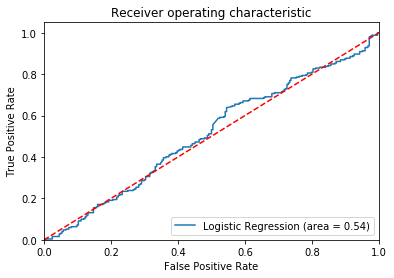

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [102]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

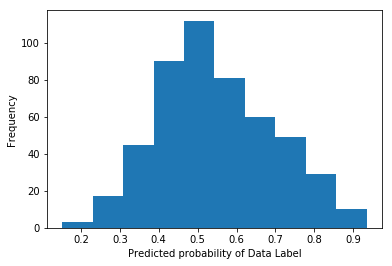

In [103]:
# plot the predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlabel('Predicted probability of Data Label')
plt.ylabel('Frequency')

In [104]:
y_pred_data_label = np.where(y_pred_prob > 0.5, 1, 0)

In [105]:
# equivalent function in scikit-learn
from sklearn.preprocessing import binarize
y_pred_data_label = binarize(y_pred_prob.reshape(1,-1), 0.5).T

In [106]:
# new confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred_data_label)
print (cm)

[[108 136]
 [ 90 162]]


In [107]:
sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity)

accuracy = (cm[0,0] + cm[1,1])/np.sum(cm)
print('Accuracy :', accuracy)

Sensitivity :  0.4426229508196721
Specificity :  0.6428571428571429
Accuracy : 0.5443548387096774


In [109]:
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(Cs=100)
lrcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [111]:
from sklearn import metrics, cross_validation

predicted = cross_validation.cross_val_predict(lrcv, X, y , cv=5)
print (metrics.accuracy_score(y, predicted))
print (metrics.classification_report(y, predicted))



0.5310136157337367
             precision    recall  f1-score   support

        0.0       0.41      0.02      0.03       924
        1.0       0.53      0.98      0.69      1059

avg / total       0.48      0.53      0.38      1983



In [126]:
res4[feature_cols]

,000 people,000 year,10 000,10 years,100 000,20 years,30 000,30 years,air force,al jazeera,...,world cup,world war,worlds biggest,worlds largest,year old,year old girl,years ago,years jail,years prison,yr old
0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.476333,0.000000,0.000000,0.281100,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.640775,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.546658,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.474474,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.659480,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.307707,0.000000,0.506809,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [131]:
X = res4[feature_cols]
y = res4.Label
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [132]:
bag = sklearn.ensemble.BaggingClassifier(LogisticRegression(C=100),
                                  n_estimators=50,
                                  max_features=100,
                                  max_samples=0.25,
                                  n_jobs=-1
                                 )

In [133]:
bag.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=100,
         max_samples=0.25, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [134]:
label_pred = bag.predict(X_test)

print(metrics.accuracy_score(y_test, label_pred))
print(mean_squared_error(y_test, label_pred))

0.5342741935483871
0.4657258064516129


In [138]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=2, random_state=0)

In [139]:
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [140]:
label_pred = bag.predict(X_test)

print(metrics.accuracy_score(y_test, label_pred))
print(mean_squared_error(y_test, label_pred))

0.5342741935483871
0.4657258064516129


In [92]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
cv_fit=cv.fit_transform(Text)
Word = cv.get_feature_names()
print (len(Word))

59977


In [47]:
cv = CountVectorizer(stop_words='english', min_df=10)
cv_fit=cv.fit_transform(Text)
Word = cv.get_feature_names()
print (len(Word))

7079


In [48]:
cv = CountVectorizer(stop_words='english', min_df=20)
cv_fit=cv.fit_transform(Text)
Word = cv.get_feature_names()
print (len(Word))

4314


In [49]:
cv = CountVectorizer(stop_words='english', min_df=40)
cv_fit=cv.fit_transform(Text)
Word = cv.get_feature_names()
print (len(Word))

2451


In [50]:
cv = CountVectorizer(stop_words='english', min_df=100)
cv_fit=cv.fit_transform(Text)
Word = cv.get_feature_names()
print (len(Word))

932


In [93]:
cv = CountVectorizer(stop_words='english', min_df=250)
cv_fit=cv.fit_transform(Text)
Word = cv.get_feature_names()
print (len(Word))

250


In [94]:
#Text = News_DIJA_data['Combined'].str.lower()

MSE = []
Accuracy = []
MaxFeatures = []

for x in range(10,250,10):   
    cv = CountVectorizer(stop_words='english', min_df=100, max_features=x)
    cv_fit=cv.fit_transform(Text)
    df5 = pd.DataFrame(cv_fit.toarray(), columns=cv.get_feature_names())
    res5 = pd.concat([News_DIJA_data, df5], axis=1)
    res5.drop(res5.iloc[:,2:27],axis=1, inplace=True)
    res5.dropna(how='any', inplace=True)
    feature_cols = cv.get_feature_names()

    X = res5[feature_cols]
    y = res5.Label
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

    logreg = LogisticRegression(C=10)
    logreg.fit(X_train, y_train)
    label_pred = logreg.predict(X_test)
    
    AccuracyScore = metrics.accuracy_score(y_test, label_pred)
    MeanSquaredError = mean_squared_error(y_test, label_pred)
    
    MaxFeatures.append(x)
    Accuracy.append(AccuracyScore)
    MSE.append(MeanSquaredError)
    
    print("The Accuracy sore and MSE for Features: ", x)
    print("Accuracy is: ", AccuracyScore )
    print("MSE is: ", MeanSquaredError )


The Accuracy sore and MSE for Features:  10
Accuracy is:  0.4798387096774194
MSE is:  0.5201612903225806
The Accuracy sore and MSE for Features:  20
Accuracy is:  0.5100806451612904
MSE is:  0.4899193548387097
The Accuracy sore and MSE for Features:  30
Accuracy is:  0.5221774193548387
MSE is:  0.4778225806451613
The Accuracy sore and MSE for Features:  40
Accuracy is:  0.5060483870967742
MSE is:  0.4939516129032258
The Accuracy sore and MSE for Features:  50
Accuracy is:  0.5100806451612904
MSE is:  0.4899193548387097
The Accuracy sore and MSE for Features:  60
Accuracy is:  0.4959677419354839
MSE is:  0.5040322580645161
The Accuracy sore and MSE for Features:  70
Accuracy is:  0.4657258064516129
MSE is:  0.5342741935483871
The Accuracy sore and MSE for Features:  80
Accuracy is:  0.4737903225806452
MSE is:  0.5262096774193549
The Accuracy sore and MSE for Features:  90
Accuracy is:  0.4717741935483871
MSE is:  0.5282258064516129
The Accuracy sore and MSE for Features:  100
Accuracy i

In [95]:
max(Accuracy)
print (max(Accuracy))
[i for i,x in enumerate(Accuracy) if x == max(Accuracy)]

0.5221774193548387


[2]

Text(0,0.5,'Accuracy')

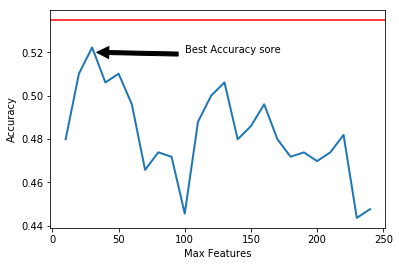

In [96]:
plt.plot(MaxFeatures, Accuracy, linewidth=2.0)
plt.axhline(y=.534743, color = 'r')
plt.annotate('Best Accuracy sore', xy=(30, 0.52), xytext=(100, 0.52),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.xlabel("Max Features")
plt.ylabel("Accuracy")

In [57]:
min(MSE)
print (min(MSE))
[i for i,x in enumerate(MSE) if x == min(MSE)]

0.4778225806451613


[2]

Text(100,0.49,'Lowest MSE sore')

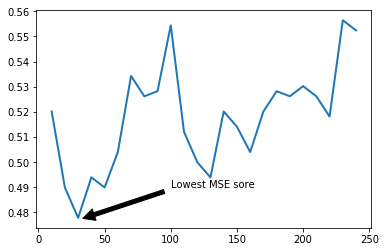

In [60]:
plt.plot(MaxFeatures, MSE, linewidth=2.0)
plt.annotate('Lowest MSE sore', xy=(30, 0.477), xytext=(100, 0.49),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

In [61]:
cv = CountVectorizer(stop_words='english', min_df=100, max_features=30)
cv_fit=cv.fit_transform(Text)
df6 = pd.DataFrame(cv_fit.toarray(), columns=cv.get_feature_names())

In [62]:
Word = cv.get_feature_names()
print(Word)

['000', 'china', 'court', 'death', 'government', 'iran', 'israel', 'israeli', 'killed', 'korea', 'military', 'million', 'minister', 'new', 'north', 'nuclear', 'old', 'people', 'police', 'president', 'russia', 'russian', 'said', 'says', 'state', 'uk', 'war', 'world', 'year', 'years']


In [63]:
print(df6)

      000  china  court  death  government  iran  israel  israeli  killed  \
0       1      1      0      0           0     4       2        3       1   
1       0      1      0      0           0     0       0        3       0   
2       0      0      0      0           0     1       0        1       0   
3       0      0      0      0           0     1       2        1       1   
4       1      0      0      2           0     0       0        0       2   
5       1      0      0      0           3     0       0        0       1   
6       1      0      0      0           0     1       0        0       0   
7       1      1      0      0           0     0       0        0       1   
8       0      0      0      1           0     0       0        0       0   
9       0      0      0      0           0     0       0        0       2   
10      0      1      0      0           1     0       0        0       0   
11      0      0      0      0           0     0       1        2       1   

In [64]:
res6 = pd.concat([News_DIJA_data, df6], axis=1)
res6.dropna(how='any', inplace=True)

In [66]:
res6.mean().sort_values(ascending=False)

says          1.200202
new           1.113969
government    0.960161
police        0.899647
people        0.880484
world         0.803833
000           0.793243
israel        0.757943
year          0.746848
war           0.734745
years         0.702471
china         0.662632
president     0.654060
killed        0.648512
said          0.579929
state         0.568835
israeli       0.553202
military      0.545638
Label         0.534039
russia        0.524962
uk            0.521936
korea         0.513868
minister      0.501261
nuclear       0.496722
russian       0.495714
north         0.492184
court         0.478568
death         0.453858
old           0.452345
iran          0.449319
million       0.442763
dtype: float64

In [67]:
text_utils.keyword_in_context(str(Text),'says', window_width = 30)

o bay wins l...
10      syria  says  its ready to put a russian mi
opec finished??  saudi arabia  says  later!"puti...
25      did sa
eeps happening, rape survivor  says : protes...
1961    colombia h


In [68]:
feature_cols = cv.get_feature_names()
X = res6[feature_cols]
y = res6.Label
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=1)

In [69]:
logreg = LogisticRegression(C=100)
logreg.fit(X_train1, y_train1)

label_pred = logreg.predict(X_test1)

print(metrics.accuracy_score(y_test1, label_pred))
print(mean_squared_error(y_test1, label_pred))

0.5201612903225806
0.4798387096774194


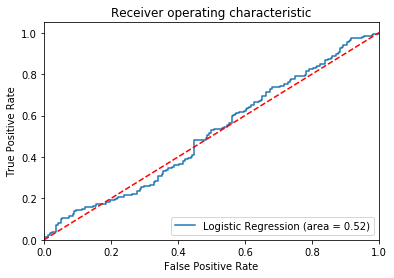

In [70]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test1, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test1, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

BaggingRegressor(base_estimator=LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0),
         bootstrap=True, bootstrap_features=False, max_features=100,
         max_samples=0.25, n_estimators=50, n_jobs=-1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
rfr = sklearn.ensemble.RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)
sklearn.metrics.r2_score(y_test, rfr.predict(X_test))